In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout , Dense, RNN , SimpleRNNCell
from sklearn.random_projection import GaussianRandomProjection
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae 
from tensorflow.keras.layers import Input, RNN, Dropout, Dense, SimpleRNNCell ,Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model

In [2]:
data = pd.read_excel("stock-data.xlsx")
data.head()

,تاریخ / میلادی,تاریخ / شمسی,indexdate,Open,Min,Max,Closed,Rc,Pc
0,2019-03-24,1398/01/04,1,178788.0,178743.0,179194.0,179194.0,572,0.0032
1,2019-03-25,1398/01/05,2,179622.0,179444.0,179847.0,179766.0,1776,0.0099
2,2019-03-26,1398/01/06,3,180037.0,180037.0,181542.0,181542.0,3816,0.021
3,2019-03-29,1398/01/09,4,181906.0,181906.0,185358.0,185358.0,77,0.0004
4,2019-03-30,1398/01/10,5,186000.0,185281.0,186783.0,185281.0,1254,0.0068


In [3]:
data.shape

(1110, 9)

In [4]:
df = data.copy()
df.shape

(1110, 9)

In [5]:
df.head()

,تاریخ / میلادی,تاریخ / شمسی,indexdate,Open,Min,Max,Closed,Rc,Pc
0,2019-03-24,1398/01/04,1,178788.0,178743.0,179194.0,179194.0,572,0.0032
1,2019-03-25,1398/01/05,2,179622.0,179444.0,179847.0,179766.0,1776,0.0099
2,2019-03-26,1398/01/06,3,180037.0,180037.0,181542.0,181542.0,3816,0.021
3,2019-03-29,1398/01/09,4,181906.0,181906.0,185358.0,185358.0,77,0.0004
4,2019-03-30,1398/01/10,5,186000.0,185281.0,186783.0,185281.0,1254,0.0068


In [6]:
df.tail()

,تاریخ / میلادی,تاریخ / شمسی,indexdate,Open,Min,Max,Closed,Rc,Pc
1105,NaT,NaN,1106,2120296.62,2110335.82,2120296.62,2110339.44,3066.8,0.0015
1106,NaT,NaN,1107,2110327.85,2105844.24,2110327.85,2107272.64,-,-
1107,NaT,NaN,1108,2107412.12,2107412.12,2114232.64,2111083.35,10909.52,0.0052
1108,NaT,NaN,1109,2111539.79,2100173.81,2111539.79,2100173.83,1701.87,0.0008
1109,NaT,NaN,1110,2098748.41,2098316.91,2099632.93,2098471.96,1701.87,0.0008


In [7]:
df.isna().sum()

تاریخ / میلادی    597
تاریخ / شمسی      597
indexdate           0
Open                0
Min                 0
Max                 0
Closed              0
Rc                  0
Pc                  0
dtype: int64

In [8]:
df.describe()

,indexdate,Open,Min,Max,Closed
count,1110.000000,1.110000e+03,1.110000e+03,1.110000e+03,1.110000e+03
mean,555.500000,1.242474e+06,1.236630e+06,1.249643e+06,1.243475e+06
std,320.573704,5.947970e+05,5.918935e+05,5.974441e+05,5.944257e+05
min,1.000000,1.787880e+05,1.787430e+05,1.791940e+05,1.791940e+05
25%,278.250000,9.387086e+05,9.292301e+05,9.496069e+05,9.431221e+05
50%,555.500000,1.355466e+06,1.344945e+06,1.361572e+06,1.355296e+06
75%,832.750000,1.547076e+06,1.540182e+06,1.552784e+06,1.545974e+06
max,1110.000000,2.535236e+06,2.527546e+06,2.548227e+06,2.535237e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   تاریخ / میلادی  513 non-null    datetime64[ns]
 1   تاریخ / شمسی    513 non-null    object        
 2   indexdate       1110 non-null   int64         
 3   Open            1110 non-null   float64       
 4   Min             1110 non-null   float64       
 5   Max             1110 non-null   float64       
 6   Closed          1110 non-null   float64       
 7   Rc              1110 non-null   object        
 8   Pc              1110 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 78.2+ KB


In [10]:
df.columns

Index(['تاریخ / میلادی', 'تاریخ / شمسی', 'indexdate', 'Open', 'Min', 'Max',
       'Closed', 'Rc', 'Pc'],
      dtype='object')

In [11]:
df.loc[:,"تاریخ / شمسی"]

0       1398/01/04
1       1398/01/05
2       1398/01/06
3       1398/01/09
4       1398/01/10
           ...    
1105           NaN
1106           NaN
1107           NaN
1108           NaN
1109           NaN
Name: تاریخ / شمسی, Length: 1110, dtype: object

In [12]:
df[ df["تاریخ / میلادی"] =='2021-03-16']

,تاریخ / میلادی,تاریخ / شمسی,indexdate,Open,Min,Max,Closed,Rc,Pc
512,2021-03-16,1399/12/26,513,1290474.5,1290474.5,1309868.4,1307657.4,1904.2,0.0015


In [13]:
missing_dates = pd.date_range(start='2021-03-17', periods=597)

In [14]:
df.loc[513:, "تاریخ / میلادی"] = missing_dates

In [15]:
df.tail()

,تاریخ / میلادی,تاریخ / شمسی,indexdate,Open,Min,Max,Closed,Rc,Pc
1105,2022-10-30,NaN,1106,2120296.62,2110335.82,2120296.62,2110339.44,3066.8,0.0015
1106,2022-10-31,NaN,1107,2110327.85,2105844.24,2110327.85,2107272.64,-,-
1107,2022-11-01,NaN,1108,2107412.12,2107412.12,2114232.64,2111083.35,10909.52,0.0052
1108,2022-11-02,NaN,1109,2111539.79,2100173.81,2111539.79,2100173.83,1701.87,0.0008
1109,2022-11-03,NaN,1110,2098748.41,2098316.91,2099632.93,2098471.96,1701.87,0.0008


In [16]:
df.drop(columns=["تاریخ / شمسی","indexdate"] , axis = 1 , inplace= True)

In [17]:
df['year'] = df["تاریخ / میلادی"].dt.year
df['month'] = df["تاریخ / میلادی"].dt.month
df['day'] = df["تاریخ / میلادی"].dt.day

In [18]:
df.set_index("تاریخ / میلادی", inplace=True)

In [19]:
df.head()

,Open,Min,Max,Closed,Rc,Pc,year,month,day
تاریخ / میلادی,,,,,,,,,
2019-03-24,178788.0,178743.0,179194.0,179194.0,572,0.0032,2019,3,24
2019-03-25,179622.0,179444.0,179847.0,179766.0,1776,0.0099,2019,3,25
2019-03-26,180037.0,180037.0,181542.0,181542.0,3816,0.021,2019,3,26
2019-03-29,181906.0,181906.0,185358.0,185358.0,77,0.0004,2019,3,29
2019-03-30,186000.0,185281.0,186783.0,185281.0,1254,0.0068,2019,3,30


In [20]:
df.tail()

,Open,Min,Max,Closed,Rc,Pc,year,month,day
تاریخ / میلادی,,,,,,,,,
2022-10-30,2120296.62,2110335.82,2120296.62,2110339.44,3066.8,0.0015,2022,10,30
2022-10-31,2110327.85,2105844.24,2110327.85,2107272.64,-,-,2022,10,31
2022-11-01,2107412.12,2107412.12,2114232.64,2111083.35,10909.52,0.0052,2022,11,1
2022-11-02,2111539.79,2100173.81,2111539.79,2100173.83,1701.87,0.0008,2022,11,2
2022-11-03,2098748.41,2098316.91,2099632.93,2098471.96,1701.87,0.0008,2022,11,3


In [21]:
df.replace('-', np.nan, inplace=True)

In [22]:
df.tail()

,Open,Min,Max,Closed,Rc,Pc,year,month,day
تاریخ / میلادی,,,,,,,,,
2022-10-30,2120296.62,2110335.82,2120296.62,2110339.44,3066.80,0.0015,2022,10,30
2022-10-31,2110327.85,2105844.24,2110327.85,2107272.64,NaN,NaN,2022,10,31
2022-11-01,2107412.12,2107412.12,2114232.64,2111083.35,10909.52,0.0052,2022,11,1
2022-11-02,2111539.79,2100173.81,2111539.79,2100173.83,1701.87,0.0008,2022,11,2
2022-11-03,2098748.41,2098316.91,2099632.93,2098471.96,1701.87,0.0008,2022,11,3


In [23]:
df.isna().sum()

Open       0
Min        0
Max        0
Closed     0
Rc         6
Pc        36
year       0
month      0
day        0
dtype: int64

In [24]:
36/len(df)

0.032432432432432434

<AxesSubplot: >

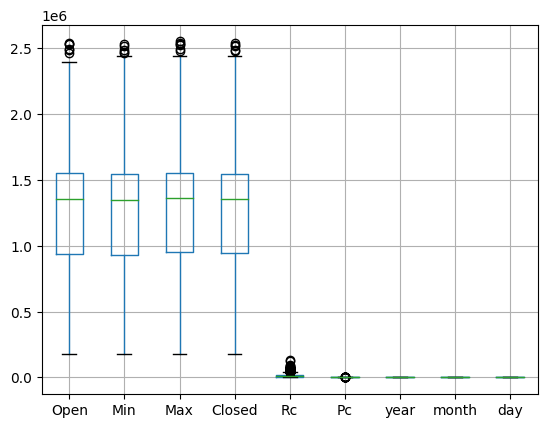

In [25]:
df.boxplot()

In [26]:
df.dropna(subset=['Rc', 'Pc'], inplace=True)

In [27]:
df.boxplot()

<AxesSubplot: >

In [28]:
df.shape

(1074, 9)

In [29]:
df["Open"].hist()

<AxesSubplot: >

In [30]:
df["log_open"] = np.log(df["Open"])

In [31]:
df["log_open"]

تاریخ / میلادی
2019-03-24    12.093956
2019-03-25    12.098610
2019-03-26    12.100918
2019-03-29    12.111245
2019-03-30    12.133502
                ...    
2022-10-29    14.570518
2022-10-30    14.567067
2022-11-01    14.560971
2022-11-02    14.562928
2022-11-03    14.556852
Name: log_open, Length: 1074, dtype: float64

In [32]:
features =df.drop(columns=["Open", "log_open"])
features.head()

,Min,Max,Closed,Rc,Pc,year,month,day
تاریخ / میلادی,,,,,,,,
2019-03-24,178743.0,179194.0,179194.0,572.0,0.0032,2019,3,24
2019-03-25,179444.0,179847.0,179766.0,1776.0,0.0099,2019,3,25
2019-03-26,180037.0,181542.0,181542.0,3816.0,0.0210,2019,3,26
2019-03-29,181906.0,185358.0,185358.0,77.0,0.0004,2019,3,29
2019-03-30,185281.0,186783.0,185281.0,1254.0,0.0068,2019,3,30


In [33]:
y = df.loc[:,"Open"]
y_log = df.loc[:,"log_open"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features, y_log, test_size=0.2,shuffle= False , random_state=42)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# LSTM

## PCA

In [35]:
pca = PCA(n_components=0.95 ,random_state= 42)  # Retain 95% of variance
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
# Reshape data for LSTM 
x_train_pca = np.reshape(x_train_pca, (x_train_pca.shape[0], 1, x_train_pca.shape[1]))
x_test_pca = np.reshape(x_test_pca, (x_test_pca.shape[0], 1, x_test_pca.shape[1]))
# Define input layer
inputs = Input(shape=(x_train_pca.shape[1], x_train_pca.shape[2]))

# LSTM layers with dropout regularization
lstm1 = LSTM(units=50, return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(units=50, return_sequences=True)(dropout1)
dropout2 = Dropout(0.2)(lstm2)

# LSTM output layer
lstm_output = LSTM(units=50)(dropout2)

# Output layer for regression
outputs = Dense(units=1)(lstm_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# Train model with validation data
history = model.fit(x_train_pca, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_pca, y_test) , callbacks=[early_stopping])

# Evaluate model
loss_lstm_pca = model.evaluate(x_test_pca, y_test)
print("Test Loss:", loss_lstm_pca)

Epoch 1/50
27/27 [==============================] - 5s 37ms/step - loss: 186.3436 - val_loss: 203.5779
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 179.1766 - val_loss: 168.0640
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 145.2456 - val_loss: 54.0881
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 71.0045 - val_loss: 9.8971
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 17.2539 - val_loss: 1.8713
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 2.5034 - val_loss: 0.2522
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6686 - val_loss: 0.0261
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4255 - val_loss: 0.0087
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3675 - val_loss: 0.0122
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3719 - val_loss: 0.0130
Epoch

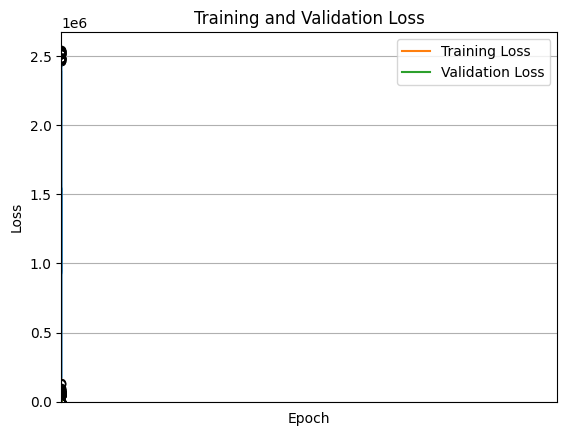

In [36]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 1s 3ms/step


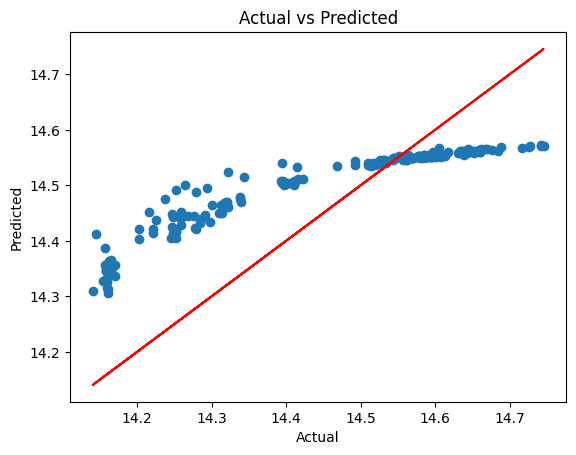

In [37]:
# Predictions
y_pred_lstm_pca = model.predict(x_test_pca)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_lstm_pca)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [38]:
# Calculate RMSE
rmse_lstm_pca = np.sqrt(mean_squared_error(y_test, y_pred_lstm_pca))
print("RMSE:", rmse_lstm_pca)

RMSE: 0.11634396919651317


In [39]:
mae_lstm_pca = mae(y_test, y_pred_lstm_pca)
print("MAE:", mae_lstm_pca)

MAE: 0.09439942734701502


## SVD

In [40]:
# Apply Singular Value Decomposition (SVD) for dimensionality reduction
svd = TruncatedSVD(n_components=4 ,random_state= 42) 
X_train_svd = svd.fit_transform(x_train_scaled)
X_test_svd = svd.transform(x_test_scaled)

# Reshape data for LSTM (assuming 2D input)
X_train_svd = np.reshape(X_train_svd, (X_train_svd.shape[0], 1, X_train_svd.shape[1]))
X_test_svd = np.reshape(X_test_svd, (X_test_svd.shape[0], 1, X_test_svd.shape[1]))

inputs = Input(shape=(X_train_svd.shape[1], X_train_svd.shape[2]))

# LSTM layers with dropout regularization
lstm1 = LSTM(units=50, return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(units=50, return_sequences=True)(dropout1)
dropout2 = Dropout(0.2)(lstm2)

# LSTM output layer
lstm_output = LSTM(units=50)(dropout2)

# Output layer for regression
outputs = Dense(units=1)(lstm_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# Train model with validation data
history = model.fit(X_train_svd, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_svd, y_test), callbacks=[early_stopping])

# Evaluate model
loss_lstm_svd = model.evaluate(X_test_svd, y_test)
print("Test Loss:", loss_lstm_svd )


Epoch 1/50
27/27 [==============================] - 4s 40ms/step - loss: 186.1710 - val_loss: 203.5170
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 178.2340 - val_loss: 173.0791
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 142.0466 - val_loss: 64.0057
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 56.4571 - val_loss: 8.2994
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 8.6073 - val_loss: 0.9366
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 1.3971 - val_loss: 0.0904
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6285 - val_loss: 0.0066
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4740 - val_loss: 0.0097
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5144 - val_loss: 0.0192
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4086 - val_loss: 0.0207
Epoch 

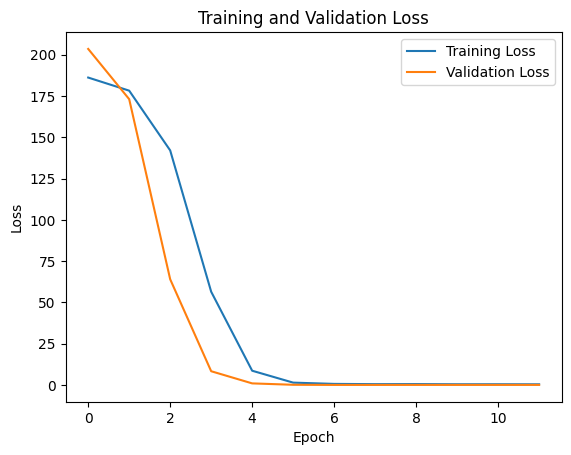

In [41]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 1s 2ms/step


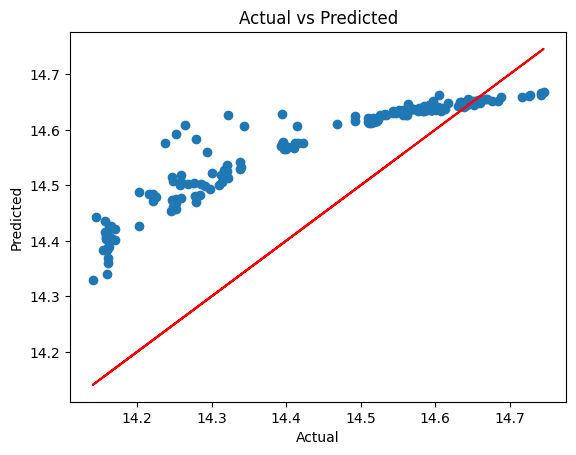

In [42]:
# Predictions
y_pred_lstm_svd = model.predict(X_test_svd)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_lstm_svd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [44]:
# Calculate RMSE
rmse_lstm_svd = np.sqrt(mean_squared_error(y_test, y_pred_lstm_svd))
print("RMSE:", rmse_lstm_svd)

RMSE: 0.1509201585466958


In [45]:
mae_lstm_svd = mae(y_test, y_pred_lstm_svd)
print("MAE:", mae_lstm_svd)

MAE: 0.12010574464860498


## GRP

In [46]:
# Apply Gaussian Random Projection for dimensionality reduction
grp = GaussianRandomProjection(n_components=4,random_state= 42) 
X_train_grp = grp.fit_transform(x_train_scaled)
X_test_grp = grp.transform(x_test_scaled)

# Reshape data for LSTM (assuming 2D input)
X_train_grp = np.reshape(X_train_grp, (X_train_grp.shape[0], 1, X_train_grp.shape[1]))
X_test_grp = np.reshape(X_test_grp, (X_test_grp.shape[0], 1, X_test_grp.shape[1]))

inputs = Input(shape=(X_train_grp.shape[1], X_train_grp.shape[2]))

# LSTM layers with dropout regularization
lstm1 = LSTM(units=50, return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(units=50, return_sequences=True)(dropout1)
dropout2 = Dropout(0.2)(lstm2)

# LSTM output layer
lstm_output = LSTM(units=50)(dropout2)

# Output layer for regression
outputs = Dense(units=1)(lstm_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# Train model with validation data
history = model.fit(X_train_grp, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_grp, y_test), callbacks=[early_stopping])

# Evaluate model
loss_lstm_grp = model.evaluate(X_test_grp, y_test)
print("Test Loss:", loss_lstm_grp)

Epoch 1/50
27/27 [==============================] - 5s 36ms/step - loss: 186.2881 - val_loss: 205.1054
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 178.9495 - val_loss: 182.2616
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 141.9352 - val_loss: 77.1758
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 55.8897 - val_loss: 9.6902
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 10.1700 - val_loss: 1.0498
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 2.2357 - val_loss: 0.1165
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 1.2940 - val_loss: 0.0279
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 1.1711 - val_loss: 0.0177
Epoch 9/50
27/27 [==============================] - 0s 5ms/step - loss: 1.0434 - val_loss: 0.0199
Epoch 10/50
27/27 [==============================] - 0s 5ms/step - loss: 0.9375 - val_loss: 0.0266
Epoch

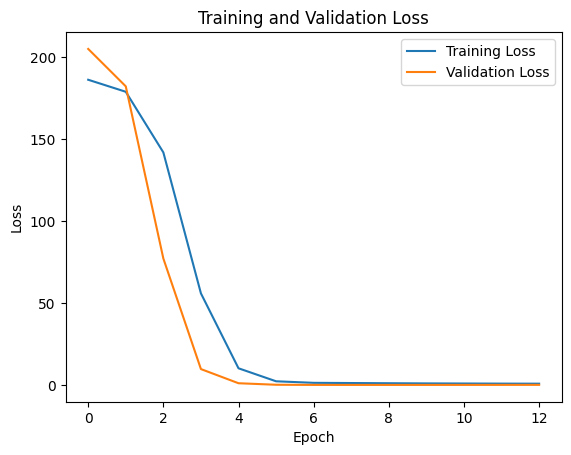

In [47]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 1s 3ms/step


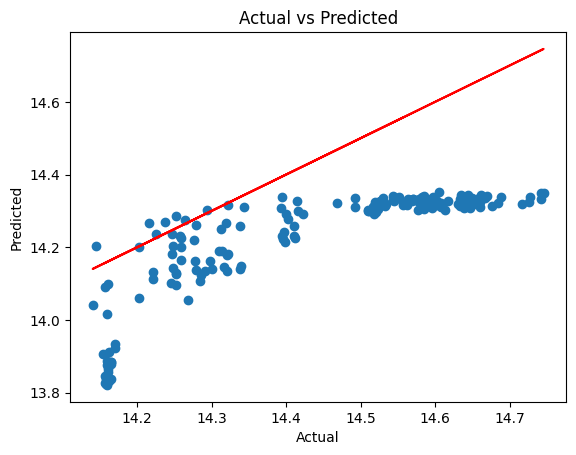

In [48]:
# Predictions
y_pred_lstm_grp = model.predict(X_test_grp)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_lstm_grp)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [49]:
# Calculate RMSE
rmse_lstm_grp = np.sqrt(mean_squared_error(y_test, y_pred_lstm_grp))
print("RMSE:", rmse_lstm_grp)

RMSE: 0.24174864670657403


In [50]:
mae_lstm_grp = mae(y_test, y_pred_lstm_grp)
print("MAE:", mae_lstm_grp)

MAE: 0.22294696251476098


# RNN

## PCA

In [51]:
# Define input layer
inputs = Input(shape=(x_train_pca.shape[1], x_train_pca.shape[2]))

# RNN layers with dropout regularization
rnn1 = RNN(SimpleRNNCell(units=50), return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(rnn1)
rnn2 = RNN(SimpleRNNCell(units=50), return_sequences=True)(dropout1)
dropout2 = Dropout(0.2)(rnn2)

# RNN output layer
rnn_output = RNN(SimpleRNNCell(units=50))(dropout2)

# Output layer for regression
outputs = Dense(units=1)(rnn_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(x_train_pca, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_pca, y_test), callbacks=[early_stopping])

# Evaluate model
loss_rnn_pca = model.evaluate(x_test_pca, y_test)
print("Test Loss:", loss_rnn_pca)


Epoch 1/50
27/27 [==============================] - 2s 14ms/step - loss: 176.7389 - val_loss: 122.5240
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 150.0157 - val_loss: 94.7274
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 95.8502 - val_loss: 71.9943
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 23.2079 - val_loss: 18.1610
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 2.3943 - val_loss: 2.3231
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.8213 - val_loss: 1.1490
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.7705 - val_loss: 0.9433
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.7536 - val_loss: 0.4720
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6134 - val_loss: 0.6348
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5367 - val_loss: 0.5822
Epoch 1

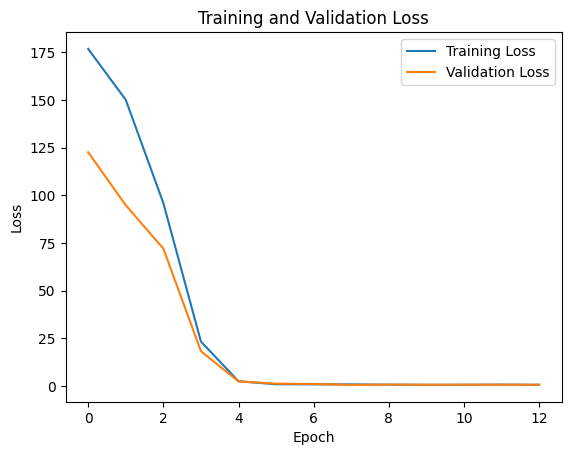

In [52]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
from tensorflow.keras.layers import Input, RNN, Dropout, Dense, SimpleRNNCell, LSTMCell, GRUCell
# Define input layer
inputs = Input(shape=(x_train_pca.shape[1], x_train_pca.shape[2]))

# RNN layers with dropout regularization
rnn1 = RNN(SimpleRNNCell(units=64), return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(rnn1)
rnn2 = RNN(LSTMCell(units=128), return_sequences=True)(dropout1)
dropout2 = Dropout(0.3)(rnn2)
rnn3 = RNN(GRUCell(units=64), return_sequences=True)(dropout2)
dropout3 = Dropout(0.2)(rnn3)

# RNN output layer
rnn_output = RNN(GRUCell(units=32))(dropout3)

# Output layer for regression
outputs = Dense(units=1)(rnn_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(x_train_pca, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_pca, y_test), callbacks=[early_stopping])

# Evaluate model
loss_rnn_pca = model.evaluate(x_test_pca, y_test)
print("Test Loss:", loss_rnn_pca)


Epoch 1/50
27/27 [==============================] - 5s 33ms/step - loss: 179.9292 - val_loss: 155.3023
Epoch 2/50
27/27 [==============================] - 0s 9ms/step - loss: 100.9782 - val_loss: 38.9490
Epoch 3/50
27/27 [==============================] - 0s 10ms/step - loss: 25.7833 - val_loss: 20.7656
Epoch 4/50
27/27 [==============================] - 0s 12ms/step - loss: 12.4988 - val_loss: 13.0451
Epoch 5/50
27/27 [==============================] - 0s 11ms/step - loss: 7.1645 - val_loss: 8.3654
Epoch 6/50
27/27 [==============================] - 0s 12ms/step - loss: 4.2066 - val_loss: 5.4087
Epoch 7/50
27/27 [==============================] - 0s 10ms/step - loss: 2.4562 - val_loss: 3.5333
Epoch 8/50
27/27 [==============================] - 0s 10ms/step - loss: 1.4853 - val_loss: 2.3786
Epoch 9/50
27/27 [==============================] - 0s 12ms/step - loss: 0.9845 - val_loss: 1.6655
Epoch 10/50
27/27 [==============================] - 0s 14ms/step - loss: 0.7442 - val_loss: 1.2304

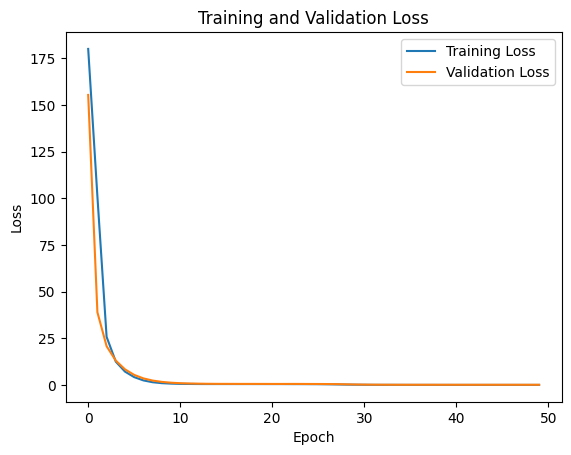

In [54]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


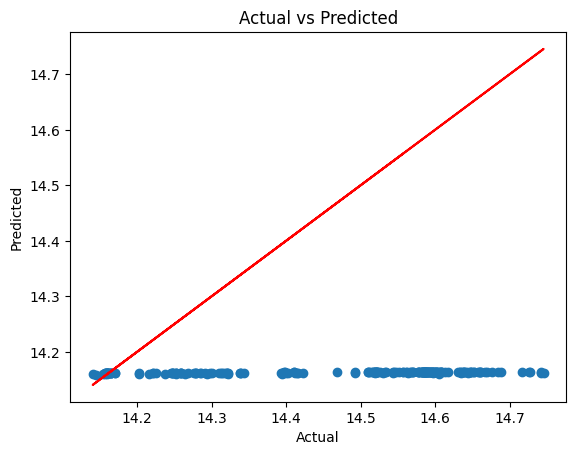

In [55]:
# Predictions
y_pred_rnn_pca = model.predict(x_test_pca)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_rnn_pca)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [56]:
# Calculate RMSE
rmse_rnn_pca = np.sqrt(mean_squared_error(y_test, y_pred_rnn_pca))
print("RMSE:", rmse_rnn_pca)

RMSE: 0.3499803982998087


In [57]:
mae_rnn_pca = mae(y_test, y_pred_rnn_pca)
print("MAE:", mae_rnn_pca)

MAE: 0.30454099810710666


## SVD

In [58]:
# Define input layer
inputs = Input(shape=(X_train_svd.shape[1], X_train_svd.shape[2]))

# RNN layers with dropout regularization
# RNN layers with dropout regularization
rnn1 = RNN(SimpleRNNCell(units=64), return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(rnn1)
rnn2 = RNN(LSTMCell(units=128), return_sequences=True)(dropout1)
dropout2 = Dropout(0.3)(rnn2)
rnn3 = RNN(GRUCell(units=64), return_sequences=True)(dropout2)
dropout3 = Dropout(0.2)(rnn3)

# RNN output layer
rnn_output = RNN(GRUCell(units=32))(dropout3)

# Output layer for regression
outputs = Dense(units=1)(rnn_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(X_train_svd, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_svd, y_test), callbacks=[early_stopping])

# Evaluate model
loss_rnn_svd = model.evaluate(X_test_svd, y_test)
print("Test Loss:", loss_rnn_svd)


Epoch 1/50
27/27 [==============================] - 4s 20ms/step - loss: 180.0102 - val_loss: 157.1492
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 103.1831 - val_loss: 37.5469
Epoch 3/50
27/27 [==============================] - 0s 6ms/step - loss: 25.3772 - val_loss: 19.4767
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 11.6223 - val_loss: 12.0436
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 6.5116 - val_loss: 7.6286
Epoch 6/50
27/27 [==============================] - 0s 6ms/step - loss: 3.7282 - val_loss: 4.8653
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 2.1766 - val_loss: 3.1596
Epoch 8/50
27/27 [==============================] - 0s 6ms/step - loss: 1.3226 - val_loss: 2.1224
Epoch 9/50
27/27 [==============================] - 0s 6ms/step - loss: 0.8867 - val_loss: 1.4954
Epoch 10/50
27/27 [==============================] - 0s 6ms/step - loss: 0.6721 - val_loss: 1.1169
Epoch 1

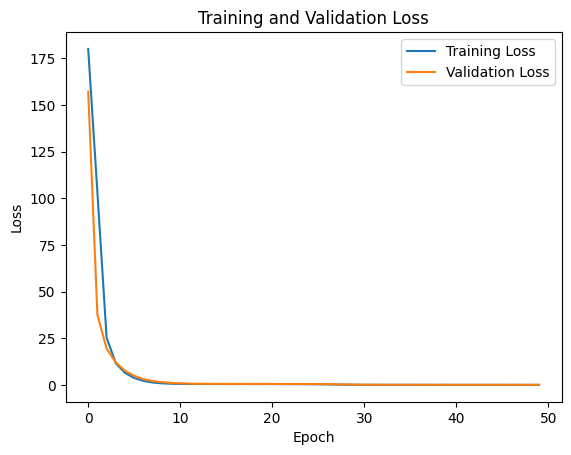

In [59]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


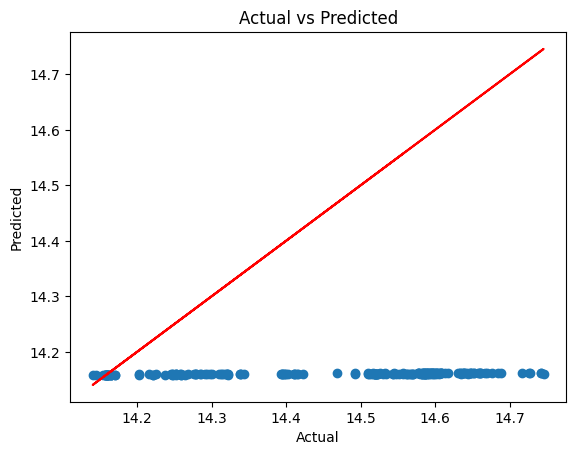

In [60]:
# Predictions
y_pred_rnn_svd = model.predict(X_test_svd)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_rnn_svd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [61]:
# Calculate RMSE
rmse_rnn_svd = np.sqrt(mean_squared_error(y_test, y_pred_rnn_svd))
print("RMSE:", rmse_rnn_svd)

RMSE: 0.3516516158905703


In [62]:
mae_rnn_svd = mae(y_test, y_pred_rnn_svd)
print("MAE:", mae_rnn_svd)

MAE: 0.3062906747879424


## GRP

In [63]:
# Define input layer
inputs = Input(shape=(X_train_grp.shape[1], X_train_grp.shape[2]))

# RNN layers with dropout regularization
# RNN layers with dropout regularization
rnn1 = RNN(SimpleRNNCell(units=64), return_sequences=True)(inputs)
dropout1 = Dropout(0.2)(rnn1)
rnn2 = RNN(LSTMCell(units=128), return_sequences=True)(dropout1)
dropout2 = Dropout(0.3)(rnn2)
rnn3 = RNN(GRUCell(units=64), return_sequences=True)(dropout2)
dropout3 = Dropout(0.2)(rnn3)

# RNN output layer
rnn_output = RNN(GRUCell(units=32))(dropout3)

# Output layer for regression
outputs = Dense(units=1)(rnn_output)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(X_train_grp, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_grp, y_test), callbacks=[early_stopping])

# Evaluate model
loss_rnn_grp = model.evaluate(X_test_grp, y_test)
print("Test Loss:", loss_rnn_grp)


Epoch 1/50
27/27 [==============================] - 4s 22ms/step - loss: 180.2642 - val_loss: 169.5750
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 106.4624 - val_loss: 45.1057
Epoch 3/50
27/27 [==============================] - 0s 6ms/step - loss: 28.2480 - val_loss: 20.7367
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 12.3990 - val_loss: 12.6467
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 6.8561 - val_loss: 8.0155
Epoch 6/50
27/27 [==============================] - 0s 6ms/step - loss: 3.9597 - val_loss: 5.1314
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 2.2965 - val_loss: 3.3377
Epoch 8/50
27/27 [==============================] - 0s 6ms/step - loss: 1.4095 - val_loss: 2.2488
Epoch 9/50
27/27 [==============================] - 0s 6ms/step - loss: 0.9386 - val_loss: 1.5791
Epoch 10/50
27/27 [==============================] - 0s 6ms/step - loss: 0.7048 - val_loss: 1.1722
Epoch 1

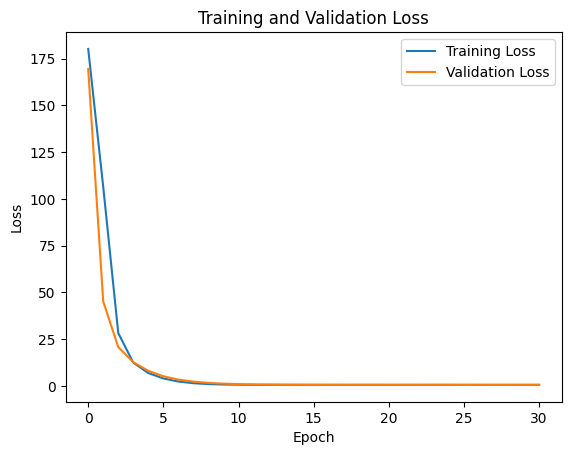

In [64]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


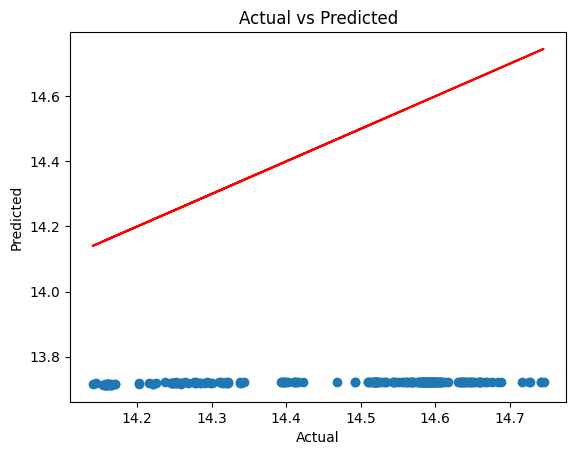

In [65]:
# Predictions
y_pred_rnn_grp = model.predict(X_test_grp)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_rnn_grp)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [66]:
# Calculate RMSE
rmse_rnn_grp = np.sqrt(mean_squared_error(y_test, y_pred_rnn_grp))
print("RMSE:", rmse_rnn_grp)

RMSE: 0.7655364954631771


In [67]:
mae_rnn_grp = mae(y_test, y_pred_rnn_grp)
print("MAE:", mae_rnn_grp)

MAE: 0.7458808973429929


# CNN

## PCA

In [68]:
# Define input layer
inputs = Input(shape=(x_train_pca.shape[1], x_train_pca.shape[2]))

# Convolutional layers with max pooling and dropout regularization
conv1 = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
pool1 = MaxPooling1D(pool_size=1)(conv1)  # Adjust pool size to 1
dropout1 = Dropout(0.2)(pool1)

conv2 = Conv1D(filters=64, kernel_size=1, activation='relu')(dropout1)
pool2 = MaxPooling1D(pool_size=1)(conv2)  # Adjust pool size to 1
dropout2 = Dropout(0.2)(pool2)

# Flatten layer to transition from 3D to 2D data
flatten = Flatten()(dropout2)

# Dense layers for further processing
dense1 = Dense(units=50, activation='relu')(flatten)
dropout3 = Dropout(0.2)(dense1)

# Output layer for regression
outputs = Dense(units=1)(dropout3)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(x_train_pca, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_pca, y_test), callbacks=[early_stopping])

# Evaluate model
loss_cnn_pca = model.evaluate(x_test_pca, y_test)
print("Test Loss:", loss_cnn_pca)


Epoch 1/50
27/27 [==============================] - 1s 6ms/step - loss: 141.3043 - val_loss: 54.9665
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 36.9425 - val_loss: 107.2574
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 16.3658 - val_loss: 48.0057
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 12.5368 - val_loss: 55.5655
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 10.8349 - val_loss: 48.9384
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 10.9736 - val_loss: 44.2302
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 10.0555 - val_loss: 35.2622
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 9.7086 - val_loss: 32.1464
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 8.9541 - val_loss: 36.9934
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 8.0600 - val_loss: 34.0673


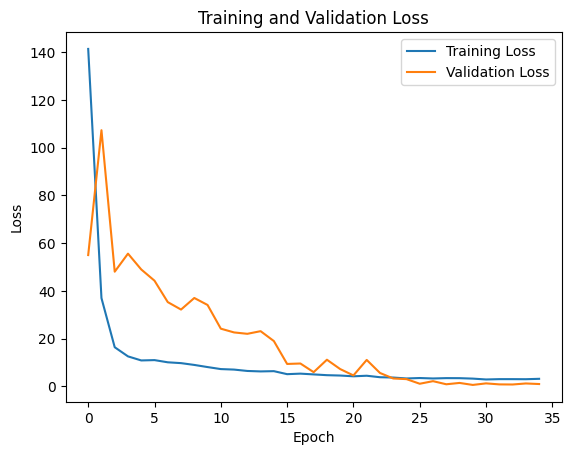

In [69]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


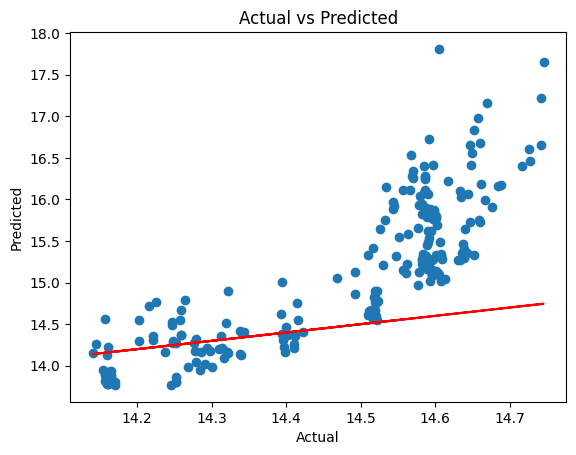

In [70]:
# Predictions
y_pred_cnn_pca = model.predict(x_test_pca)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_cnn_pca)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [71]:
# Calculate RMSE
rmse_cnn_pca = np.sqrt(mean_squared_error(y_test, y_pred_cnn_pca))
print("RMSE:", rmse_cnn_pca)

RMSE: 0.9760820607219929


In [72]:
# Calculate RMSE
mae_cnn_pca = mae(y_test, y_pred_cnn_pca)
print("RMSE:", mae_cnn_pca)

RMSE: 0.7392968527632645


## SVD

In [73]:
# Define input layer
inputs = Input(shape=(X_train_svd.shape[1], X_train_svd.shape[2]))

# Convolutional layers with max pooling and dropout regularization
conv1 = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
pool1 = MaxPooling1D(pool_size=1)(conv1)  # Adjust pool size to 1
dropout1 = Dropout(0.2)(pool1)

conv2 = Conv1D(filters=64, kernel_size=1, activation='relu')(dropout1)
pool2 = MaxPooling1D(pool_size=1)(conv2)  # Adjust pool size to 1
dropout2 = Dropout(0.2)(pool2)

# Flatten layer to transition from 3D to 2D data
flatten = Flatten()(dropout2)

# Dense layers for further processing
dense1 = Dense(units=50, activation='relu')(flatten)
dropout3 = Dropout(0.2)(dense1)

# Output layer for regression
outputs = Dense(units=1)(dropout3)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(X_train_svd, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_svd, y_test), callbacks=[early_stopping])

# Evaluate model
loss_cnn_svd = model.evaluate(X_test_svd, y_test)
print("Test Loss:", loss_cnn_svd )


Epoch 1/50
27/27 [==============================] - 1s 6ms/step - loss: 163.0724 - val_loss: 103.8935
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 60.3808 - val_loss: 55.6999
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 15.3274 - val_loss: 77.5863
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 12.2407 - val_loss: 79.3704
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 12.5942 - val_loss: 69.5383
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 11.1046 - val_loss: 51.1370
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 9.9413 - val_loss: 58.2592
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 10.9674 - val_loss: 35.5316
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 9.3151 - val_loss: 44.1744
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 8.3615 - val_loss: 37.2454


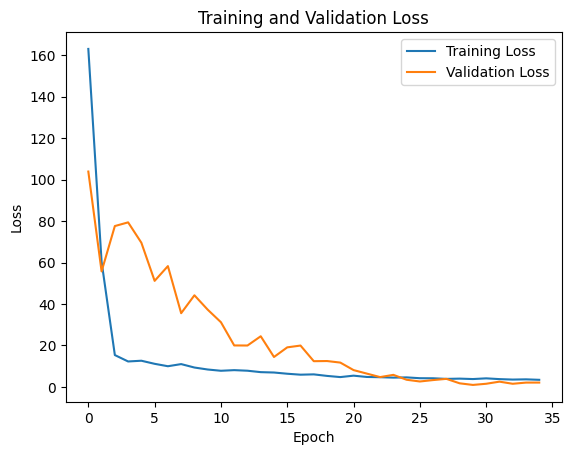

In [74]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


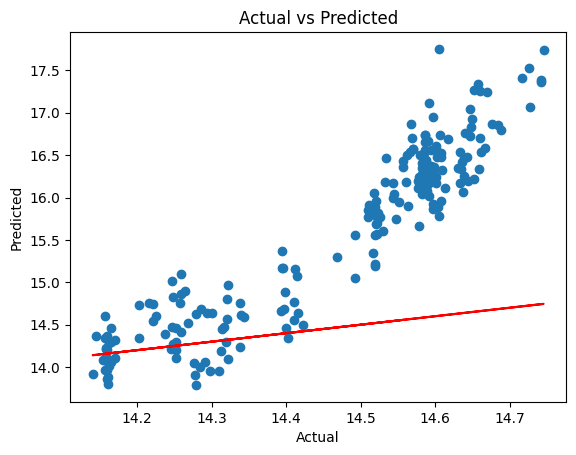

In [75]:
# Predictions
y_pred_cnn_svd = model.predict(X_test_svd)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_cnn_svd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [76]:
# Calculate RMSE
rmse_cnn_svd = np.sqrt(mean_squared_error(y_test, y_pred_cnn_svd))
print("RMSE:", rmse_cnn_svd)

RMSE: 1.433746942918826


In [77]:
# Calculate RMSE
mae_cnn_svd = mae(y_test, y_pred_cnn_svd)
print("MAE:", mae_cnn_svd)

MAE: 1.185743809569557


## GRP

In [78]:
# Define input layer
inputs = Input(shape=(X_train_grp.shape[1], X_train_grp.shape[2]))

# Convolutional layers with max pooling and dropout regularization
conv1 = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
pool1 = MaxPooling1D(pool_size=1)(conv1)  # Adjust pool size to 1
dropout1 = Dropout(0.2)(pool1)

conv2 = Conv1D(filters=64, kernel_size=1, activation='relu')(dropout1)
pool2 = MaxPooling1D(pool_size=1)(conv2)  # Adjust pool size to 1
dropout2 = Dropout(0.2)(pool2)

# Flatten layer to transition from 3D to 2D data
flatten = Flatten()(dropout2)

# Dense layers for further processing
dense1 = Dense(units=50, activation='relu')(flatten)
dropout3 = Dropout(0.2)(dense1)

# Output layer for regression
outputs = Dense(units=1)(dropout3)

# Define model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train model with validation data
history = model.fit(X_train_grp, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_grp, y_test), callbacks=[early_stopping])

# Evaluate model
loss_cnn_grp = model.evaluate(X_test_grp, y_test)
print("Test Loss:", loss_cnn_grp)


Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 152.2287 - val_loss: 90.5068
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 52.8047 - val_loss: 104.0476
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 17.8215 - val_loss: 62.7263
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 13.1034 - val_loss: 44.0911
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 11.4284 - val_loss: 52.4846
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 10.8311 - val_loss: 40.1995
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 9.7805 - val_loss: 30.7353
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 9.5971 - val_loss: 46.2852
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 8.1307 - val_loss: 28.8066
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 8.1925 - val_loss: 25.3167
E

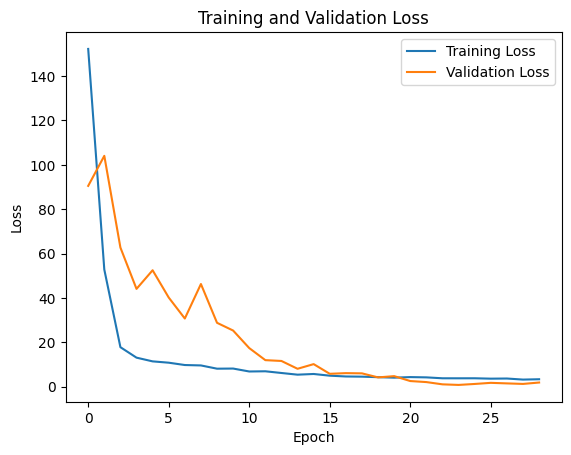

In [79]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 125us/step


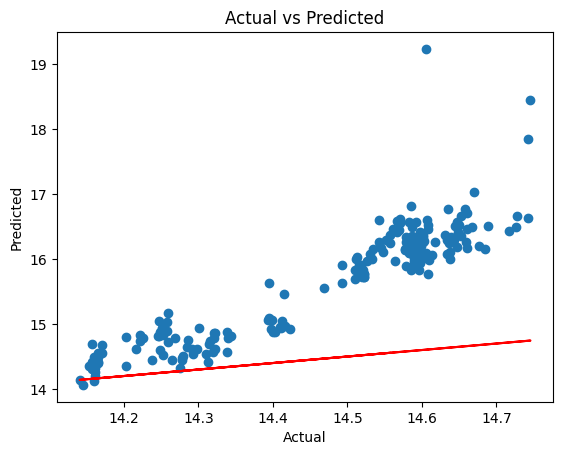

In [80]:
# Predictions
y_pred_cnn_grp = model.predict(X_test_grp)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_cnn_grp)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Add abline (identity line)
plt.plot(y_test, y_test, color='red')  # abline with slope 1 and intercept 0
plt.show()

In [81]:
# Calculate RMSE
rmse_cnn_grp = np.sqrt(mean_squared_error(y_test, y_pred_cnn_grp))
print("RMSE:", rmse_cnn_grp)

RMSE: 1.3775978413921182


In [82]:
mae_cnn_grp = mae(y_test, y_pred_cnn_grp)
print("MAE:", mae_cnn_grp)

MAE: 1.1820537769849695


In [83]:
model_comp = pd.DataFrame({'Mean of squared error':  [loss_lstm_pca , loss_lstm_svd,loss_lstm_grp ,
                           loss_rnn_pca , loss_rnn_svd,loss_rnn_grp ,loss_cnn_pca , loss_cnn_svd,loss_cnn_grp]  ,
                           'Mean of absolute error' : [mae_lstm_pca , mae_lstm_svd , mae_lstm_grp ,
                           mae_rnn_pca , mae_rnn_svd , mae_rnn_grp ,mae_cnn_pca , mae_cnn_svd , mae_cnn_grp],
                           'Root Mean of squared error' : [rmse_lstm_pca , rmse_lstm_svd , rmse_lstm_grp,
                           rmse_rnn_pca , rmse_rnn_svd , rmse_rnn_grp ,rmse_cnn_pca , rmse_cnn_svd , rmse_cnn_grp],}
                           , index = ['LSTM_PCA' , 'LSTM_SVD' , 'LSTM_GRP' ,'RNN_PCA' , 'RNN_SVD' , 'RNN_GRP',
                           'CNN_PCA' , 'CNN_SVD' , 'CNN_GRP'])
model_comp

,Mean of squared error,Mean of absolute error,Root Mean of squared error
LSTM_PCA,0.013536,0.094399,0.116344
LSTM_SVD,0.022777,0.120106,0.150920
LSTM_GRP,0.058442,0.222947,0.241749
RNN_PCA,0.122486,0.304541,0.349980
RNN_SVD,0.123659,0.306291,0.351652
RNN_GRP,0.586046,0.745881,0.765536
CNN_PCA,0.952736,0.739297,0.976082
CNN_SVD,2.055630,1.185744,1.433747
CNN_GRP,1.897776,1.182054,1.377598


In [113]:
y_test_reshaped = y_test[-50:].values.reshape(-1, 1)
pd.set_option('display.expand_frame_repr', False)
table_pred = pd.DataFrame({
    'Y_True': y_test_reshaped.flatten(),
    'Y_LSTM_PCA': y_pred_lstm_pca[-50:].flatten(),
    'Y_LSTM_SVD': y_pred_lstm_svd[-50:].flatten(),
    'Y_LSTM_GRP': y_pred_lstm_grp[-50:].flatten(),
    'Y_RNN_PCA': y_pred_rnn_pca[-50:].flatten(),
    'Y_RNN_SVD': y_pred_rnn_svd[-50:].flatten(),
    'Y_RNN_GRP': y_pred_rnn_grp[-50:].flatten(),
    'Y_CNN_PCA': y_pred_cnn_pca[-50:].flatten(),
    'Y_CNN_SVD': y_pred_cnn_svd[-50:].flatten(),
    'Y_CNN_GRP': y_pred_cnn_grp[-50:].flatten()
})

print(table_pred)

       Y_True  Y_LSTM_PCA  Y_LSTM_SVD  Y_LSTM_GRP  Y_RNN_PCA  Y_RNN_SVD  Y_RNN_GRP  Y_CNN_PCA  Y_CNN_SVD  Y_CNN_GRP
0   14.521703   14.538884   14.618620   14.306742  14.162800  14.160797  13.721581  14.768211  15.767705  15.724655
1   14.519987   14.539072   14.619129   14.303905  14.162779  14.160748  13.721542  14.901928  15.890779  15.724035
2   14.519892   14.538501   14.618352   14.314382  14.162798  14.160825  13.721604  14.823439  15.556435  15.758152
3   14.522431   14.539504   14.620215   14.312597  14.162797  14.160805  13.721577  14.900578  15.696058  15.773512
4   14.530651   14.546450   14.627609   14.336116  14.162645  14.160788  13.721723  15.217148  15.607097  16.083433
5   14.548152   14.548437   14.631091   14.334157  14.162760  14.160880  13.721716  15.323576  15.749956  16.107712
6   14.551825   14.552256   14.636250   14.338650  14.162709  14.160857  13.721737  15.542389  15.943241  16.298601
7   14.577379   14.551612   14.637782   14.326917  14.162888  14.160948 